# Task 4.9

# Part 2

# Step 1 - Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Path
path = r'C:\Users\35196\Documents\Alexandra\Data Analytics Program\02 Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis'

In [4]:
# Import the most up-to-date data
ords_prods_customers_merge =pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_aggregated.pkl'))

# Step 2 - If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

I did it during the exercise

# Step 3 - Create a histogram of the “order_hour_of_day” column

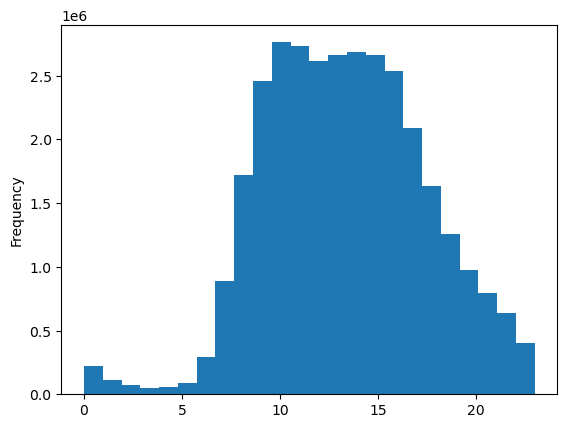

In [31]:
hist = ords_prods_customers_merge['order_hour_of_day'].plot.hist(bins = 24)

Since the day has 24 hours, I set the bins equal to 24. The histogram shows the frequency of orders for each hour. 
During night we can see lower frequency, that means less orders. 
Then in early morning hours the nummber of orders increase and the high peak is achieved in the middle of the day (11 to 17 +/-).
After that time and until end of the day the number of orders decrease.

In conclusion I can say the customers prefer late morning and early afternoon to use Instacart.

# Step 4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

In [8]:
ords_prods_customers_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   Unnamed: 0_x                   int64   
 1   order_id                       int64   
 2   user_id                        int64   
 3   eval_set                       object  
 4   order_number                   int64   
 5   order_dow                      int64   
 6   order_hour_of_day              int64   
 7   days_since_prior_order         float64 
 8   product_id                     int64   
 9   add_to_cart_order              int64   
 10  reordered                      int64   
 11  Unnamed: 0_y                   int64   
 12  product_name                   object  
 13  aisle_id                       int64   
 14  department_id                  int64   
 15  prices                         float64 
 16  price_range                    object  
 17  busiest_days             

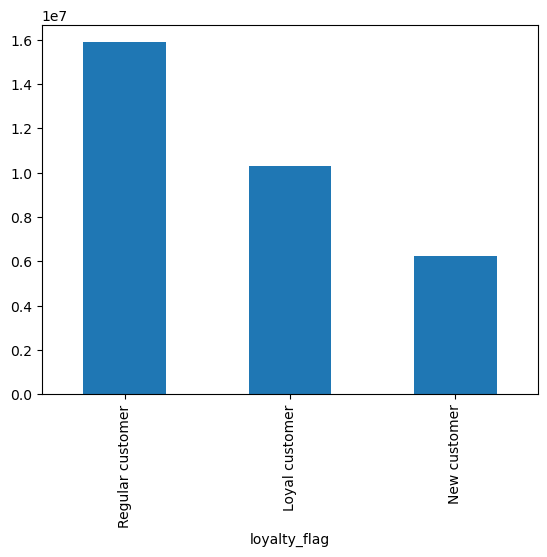

In [33]:
bar = ords_prods_customers_merge['loyalty_flag'].value_counts().plot.bar()

# Step 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [11]:
# Create a random sample 
np.random.seed(4)

In [13]:
# Sampling Data 70/30
dev = np.random.rand(len(ords_prods_customers_merge)) <= 0.7

In [14]:
# Store 70% of the sample in the dataframe big
big = ords_prods_customers_merge[dev]

In [15]:
# Store 30% of the sample in the dataframe small
small = ords_prods_customers_merge[~dev]

In [16]:
# Checking the totals
len(ords_prods_customers_merge)

32404859

In [17]:
len(big) + len( small)

32404859

In [18]:
# A new dataframe that contains only the "prices" and "order_hour_of_day" columns from small subset
df_2 = small[['order_hour_of_day','prices']]

In [19]:
df_2

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


C:\Users\35196\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\35196\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


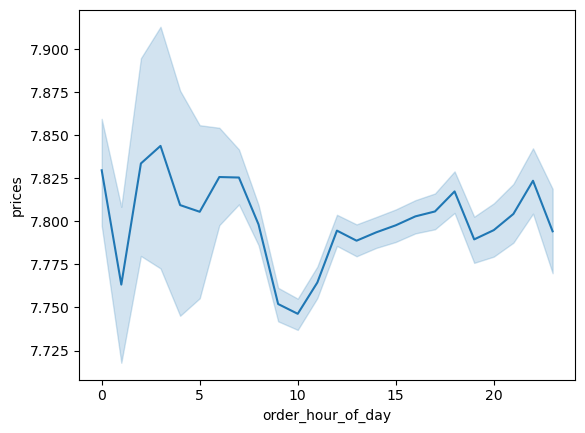

In [20]:
# Create the line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

# Step 6 - Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns

# Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [24]:
# Create a new dataframe that contains only the "age" and "n_dependants" columns from small subset 
df_3 = small[['age','n_dependants']]

In [25]:
df_3

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


C:\Users\35196\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\35196\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


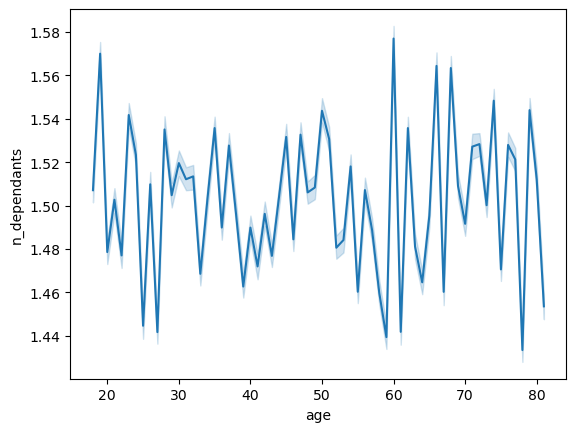

In [27]:
# Create the line chart
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

There is no clear pattern between age and number of dependent. I expected more consistent pattern between 30 and 60 years old.
And also an increase in the younger people and a descrease in the older users.

# Step 7 - You’ll also need to explore whether there’s a connection between age and spending power (income)

# To visualize this relationship, create a scatterplot using the sns.scatterplot() function

In [29]:
# Create a new dataframe that contains only the "age" and "income" columns from small subset 
df_4 = small[['age','income']]

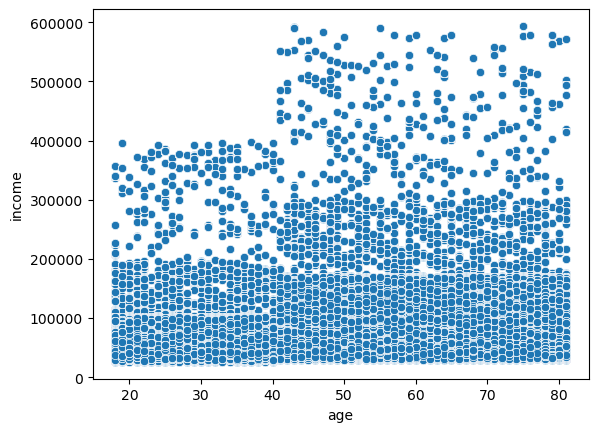

In [30]:
# Create a scatterplot
scatterplot = sns.scatterplot(data = df_4, x = 'age', y = 'income')

For all ages there is a concentration on the incomes lower than 200k.
Younger people (until 40 years old) have incomes lower than 400k and with lower concentration between 200k and 400k.
From 40 years old onwards, it is possible to identify three different patterns:
 - High concentration - incomes lower than 200k (+/-)
 - medium concentration - incomes between 200 and 300k
 - lower concentration - incomes higher than 300k

# Step 8 - Export your visualizations as “.png” files in your relevant project folder

In [32]:
# Export Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [34]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [35]:
# Export Line chart - expenditure (the “prices” column) depending on the hour of the day
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_over_hours_of_day.png'))

In [36]:
# Export Line chart - connections between age and number of dependents
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_and_n_dependents.png'))

In [37]:
# Export scatterplot - connection between age and spending power (income)
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_spending_power.png'))